#Principal Component Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.spatial.transform import Rotation

m = 60
X = np.zeros((m,3))         # initailize 3D dataset
np.random.seed(42)
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi   # uneven distribution
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles) * 0.5       # oval
X += 0.28 * np.random.randn(m, 3)     # add more noise
X = Rotation.from_rotvec([np.pi / 29, -np.pi / 20, np.pi / 4]).apply(X)
X += [0.2, 0, 0.2]      # shift a bit

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)       # n_components --> select the amount of data (if >= 1 then # of columns, else % of data)      n_components hem float hem integer deyer alir          1 ve 1den boyukduse sutun sayidir      1den kicikdise datanin faizini gosterir meselen 0.95 datanin 95 faizini saxlayan sutun var
X2D = pca.fit_transform(X)        # fit transform train data, but just transform test data

In [5]:
X2D.shape

(60, 2)

In [6]:
pca.components_

array([[ 0.67857588,  0.70073508,  0.22023881],
       [ 0.72817329, -0.6811147 , -0.07646185]])

In [7]:
pca.explained_variance_ratio_     #her kecdiyi vektorda hansi qeder data var faizle onu gosterir. birinci kechirdiyi vektorda 75% ikincide 15% data var

array([0.7578477 , 0.15186921])

In [8]:
1 - pca.explained_variance_ratio_.sum()   # ne qeder datani itirdiyimizi bilmek uchun 1 (100%) -den componentlerde olan data miqdarinin cemini chixiriq

np.float64(0.09028309326742034)

Ne qeder data itirmeye haziriqsa o qeder reduction edirik dimensionality

In [9]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame = False, parser= 'auto')   #parser ozu duzgun bolsun deye verilir
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1           #datanin 95% den choxunu saxlayan hali tapir

In [10]:
d

np.int64(154)

In [ ]:
pca = PCA(n_components = 0.95)      #eger 1 den boyuk tam reqem versek o saya qeder dimensionality ni azaldir
X_reduced = pca.fit_transform(X_train)    # uje fit verib

In [11]:
pca.n_components_     #95% datani saxladigi halda dimensionalitiyni necheye qeder saldigini gosterir

784

In [12]:
%%time
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

CPU times: user 55.9 s, sys: 108 ms, total: 56.1 s
Wall time: 56.3 s


0.9706

In [ ]:
test_reduced = pca.transform(X_test)

In [ ]:
rfc.fit(X_reduced, y_train)

RandomForestClassifier()

In [ ]:
rfc.score(test_reduced, y_test)

0.9503

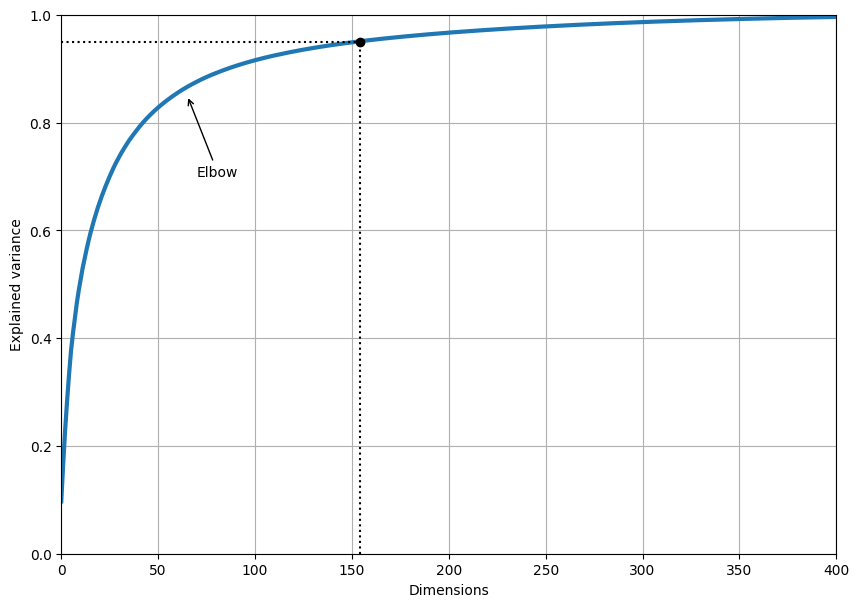

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel('Dimensions')
plt.ylabel('Explained variance')
plt.plot([d, d], [0, 0.95], 'k:')
plt.plot([0, d], [0.95, 0.95], 'k:')
plt.plot(d, 0.95, 'ko')
plt.annotate("Elbow", xy = (65, 0.85), xytext = (70, 0.7),
             arrowprops = dict(arrowstyle="->"))
plt.grid(True)
plt.show()

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV

pipeline = make_pipeline(PCA(),
                         RandomForestClassifier(random_state=42))

param_grid = {
    "pca__n_components" : np.arange(10, 80),
    "randomforestclassifier__n_estimators" : np.arange(50,500)
}

rscv = RandomizedSearchCV(pipeline, param_grid, n_iter = 10, cv =3)
rscv.fit(X_train[:1000], y_train[:1000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 6...
       401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413,
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499])})

In [ ]:
rscv.best_params_

{'randomforestclassifier__n_estimators': np.int64(180),
 'pca__n_components': np.int64(31)}

In [ ]:
cumsum[58]

np.float64(0.8501877639284675)

In [ ]:
rscv.score(X_test, y_test)

0.854

In [ ]:
print(rscv.best_params_)

{'randomforestclassifier__n_estimators': np.int64(180), 'pca__n_components': np.int64(31)}


In [ ]:
rscv.best_estimator_.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=np.int64(31))),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=np.int64(180),
                                        random_state=42))])

In [ ]:
rscv.best_estimator_.score(X_train, y_train), rscv.best_estimator_.score(X_test, y_test)

(1.0, 0.9543)

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

sgd_pipeline = make_pipeline(PCA(random_state=42),
                             SGDClassifier(random_state=42))

sgd_param_grid = {
    'pca__n_components' : np.arange(10, 80)
}

sgd_gscv = GridSearchCV(sgd_pipeline, sgd_param_grid, cv = 3)
sgd_gscv.fit(X_train[:1000], y_train[:1000])

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=42))]),
             param_grid={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79])})

In [ ]:
sgd_gscv.best_params_

{'pca__n_components': np.int64(79)}

In [ ]:
best_model = sgd_gscv.best_estimator_

In [ ]:
best_model.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=79, random_state=42)),
                ('sgdclassifier', SGDClassifier(random_state=42))])

In [ ]:
best_model.score(X_train, y_train), best_model.score(X_test, y_test)

(0.8830833333333333, 0.8886)

Incremental PCA --> eger PCA edirikse butun data RAM a yigilir. Bele olan halda incremental PCA kimi yollardan istifade edirik. O melumatlari hisse hisse emal edir

#PCA for Compression

In [ ]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components = 154)
for X_batch in np.array_split(X_train, n_batches):    # X_train datasini n_batches sayina bolur
  inc_pca.partial_fit(X_batch)                        #adi fit de yesini oyrendikce kohneni unudur, amma partial fit olanda oyrendiyinin uzerinden davam edir

X_reduced = inc_pca.transform(X_train)


#LLE

projection / manifold - 2 approach

In [ ]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding

X_swiss, t = make_swiss_roll(n_samples = 1000, noise = 0.2, random_state = 42)
lle = LocallyLinearEmbedding(n_components = 2, n_neighbors = 10, random_state = 42)
X_unrolled = lle.fit_transform(X_swiss)

#Hands-on

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame = False, parser='auto')         #parser ozu dugun bolsun deye verir
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

#T-SNE

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE

mnist = fetch_openml('mnist_784', as_frame = False, parser='auto')
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

#T-SNE uchun vacib olan verilenlerin normalizasiyasi
X_train = X_train / 255.0


In [ ]:
subset_size = 3000     #1000-5000 numune sechirik, cox boyuk numune t-sne ucun vaxt aparir
X_subset = X_train[:subset_size]
y_subset = y_train[:subset_size]

In [ ]:
tsne = TSNE(n_components=2, perplexity = 30, random_state = 42, n_iter = 1000)
X_tsne = tsne.fit_transform(X_subset)     # 2D koordinatlara dushur

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


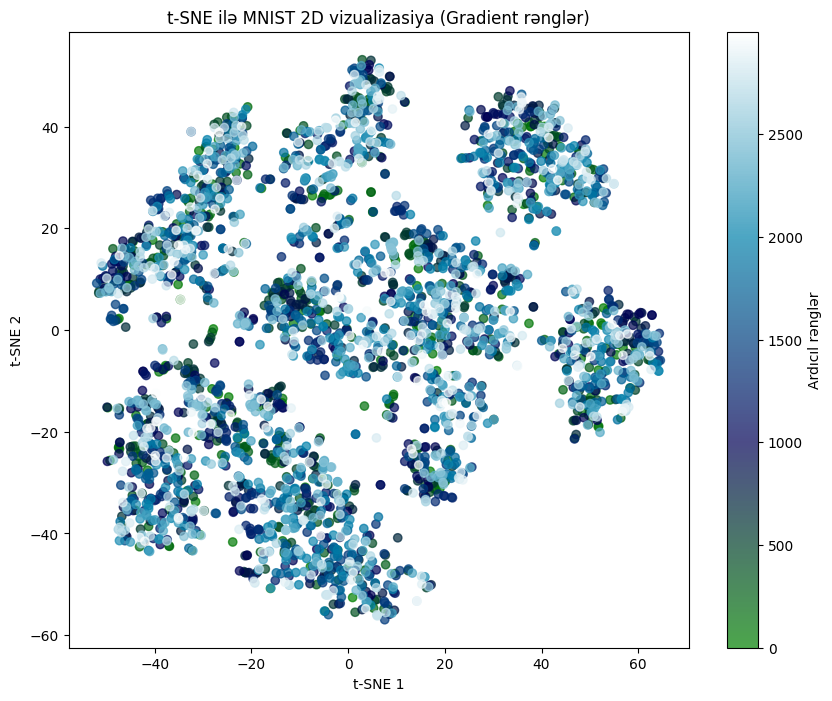

In [ ]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=np.arange(len(y_subset)), cmap="ocean", alpha=0.7)
plt.colorbar(scatter, label="Ardıcıl rənglər")
plt.title("t-SNE ilə MNIST 2D vizualizasiya (Gradient rənglər)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()